###### bloquer la génération des feux

In [51]:
import numpy as np
import matplotlib.pyplot as plt

exec(open("ode2.py").read(), globals())

In [83]:
a = 0.1
Param_phy = [a, 2.]      # 0.2, 10
      
#Init = [0.5, Param_phy[1]]
Init = [1., 2.0]



Param_freq = {"p":  .5}#2
dt = min([0.1, 0.1/Param_freq["p"]])


finalTime = 100
Param_strength = {"scale":0.002} # 0.0008
Param_coupled = {"alpha":20., # 20
                 "beta":2.}# 500



Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}

### Initial plot

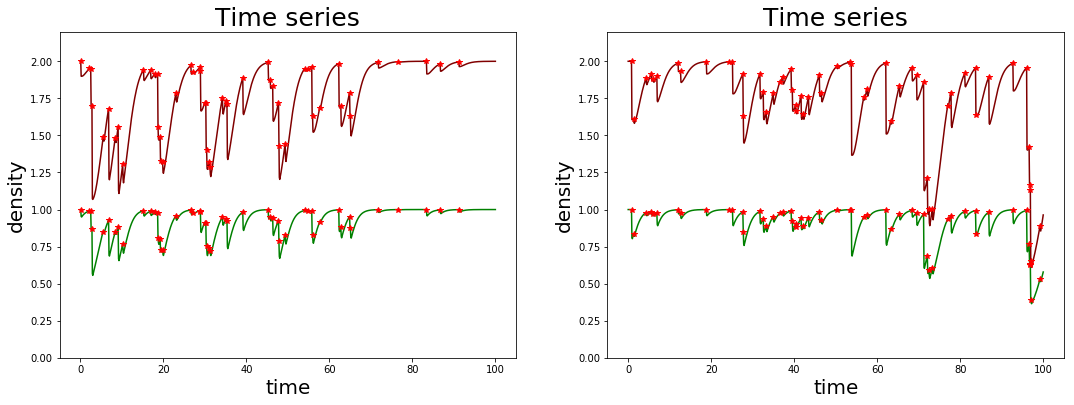

In [84]:
nParall = 2
Fire_events = np.zeros((nParall, 1000), dtype="bool")
Fire_strength = np.zeros((nParall, 1000))
plt.figure(figsize = (18, 6))
for j in range(nParall):
    O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
    Fire_events[j, :] = O.Fire_events
    Fire_strength[j] = O.Fire_strength
    O.solve_by_part()
    #plt.figure(figsize = (12, 6))
    plt.subplot(1, nParall, j+1)
    O.plot_time_series(generation=False, show=False, legend = False)
plt.show()

# Same simulation for different $m$

In [85]:
M = [0.3, 0.5, 1., 2., 3., 5., 7., 10.]

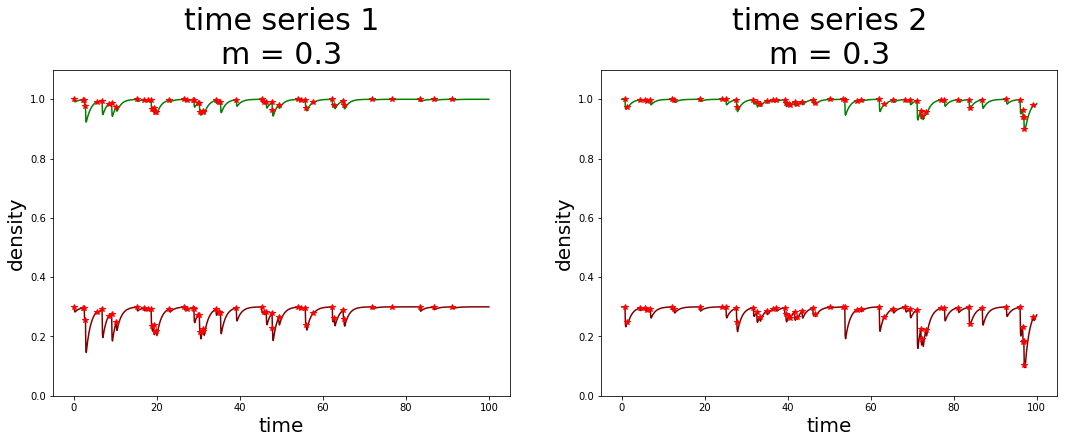

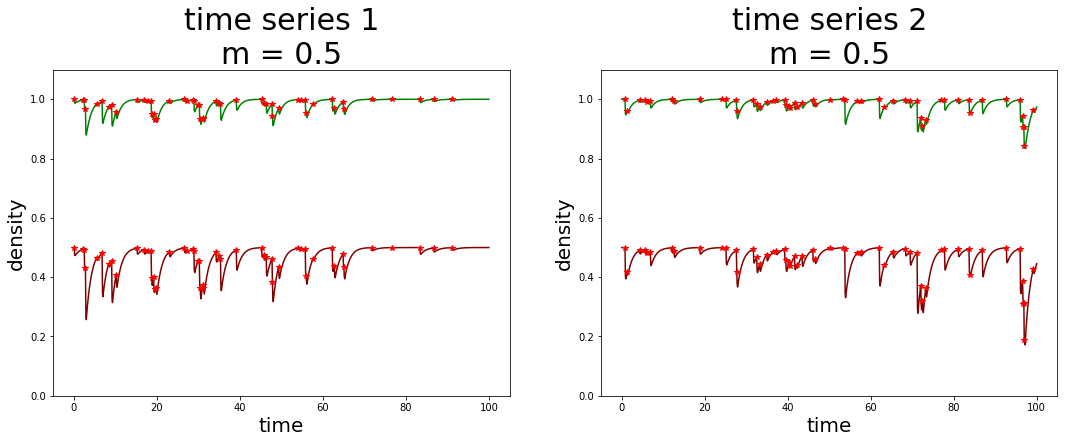

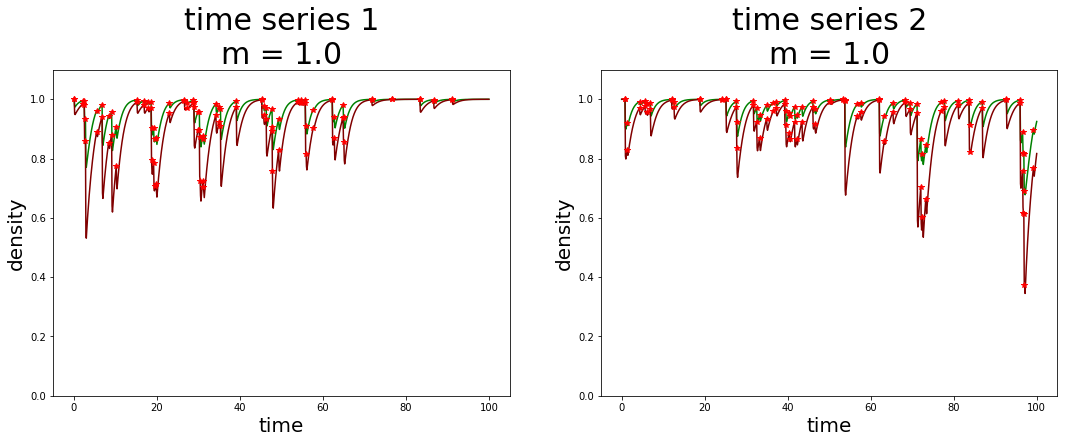

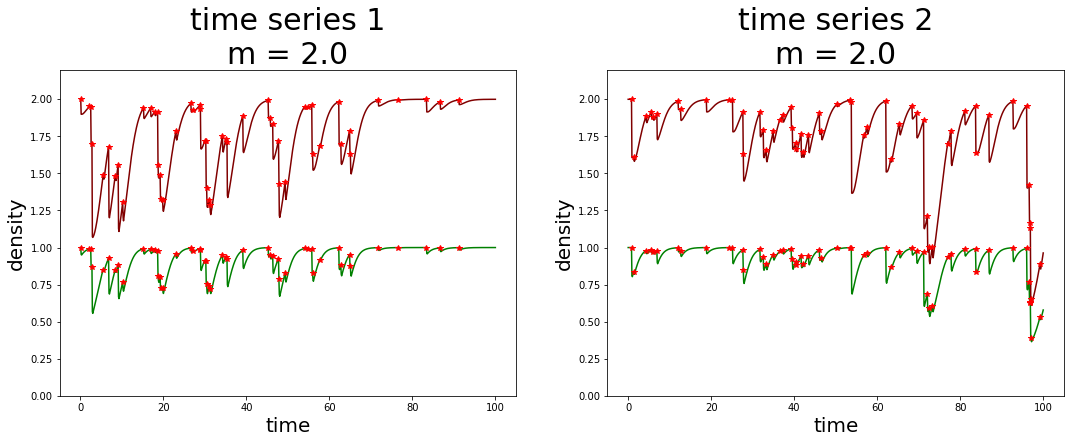

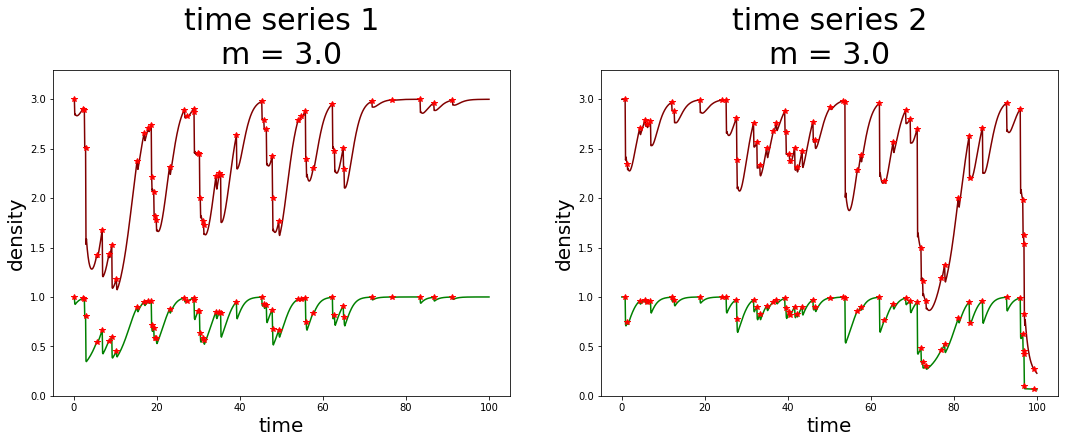

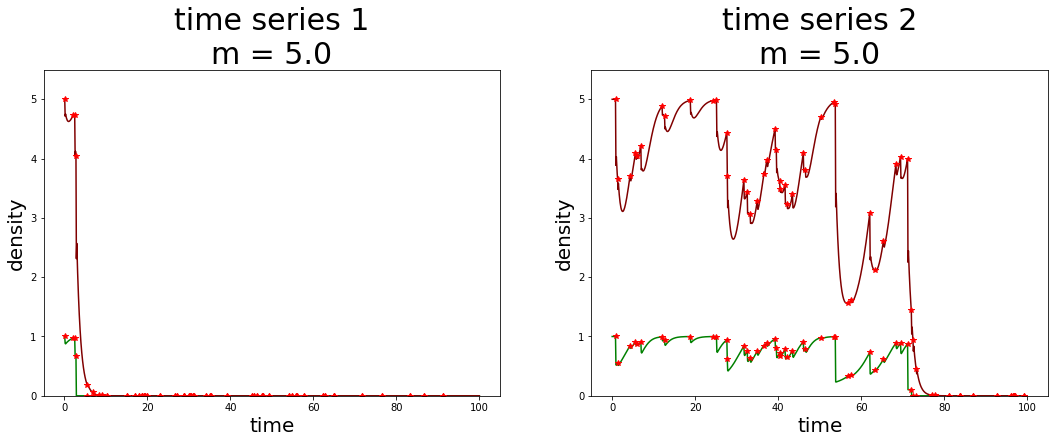

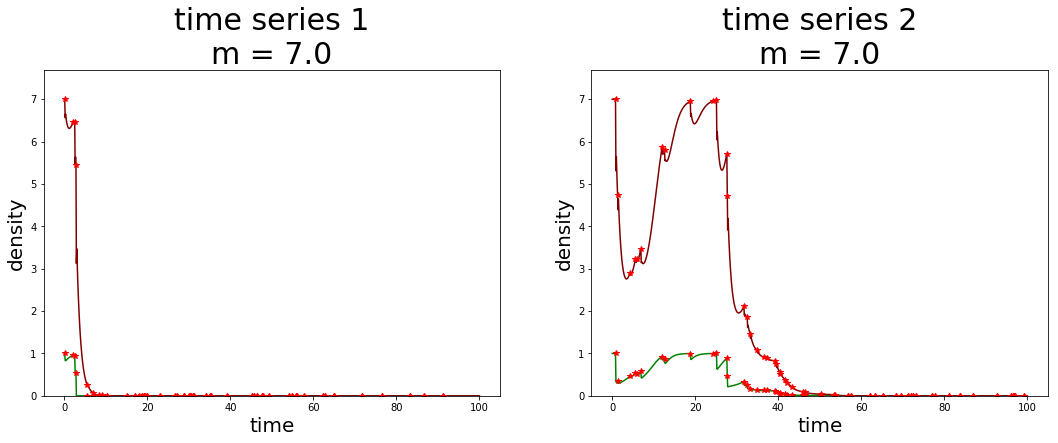

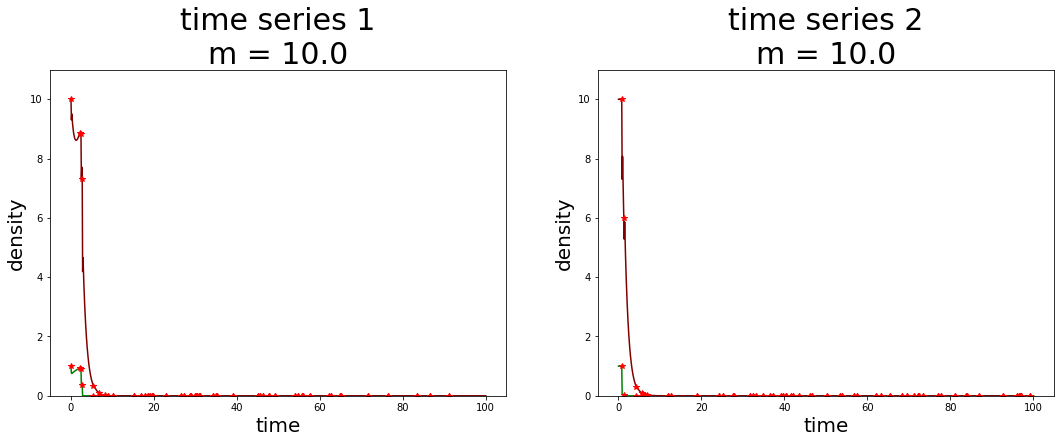

In [90]:
for i, m in enumerate(M):
    Param_phy[1] = m
    Init[1] = Param_phy[1]
    #print("m = "+str(m))
    plt.figure(figsize = (18, 6))
    for j in range(nParall):
        O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
        O.Fire_events  = Fire_events[j]
        O.Fire_strength = Fire_strength[j]
        O.solve_by_part()
    
        plt.subplot(1, nParall, j+1)
        O.plot_time_series(generation=False, show=False, legend = False)
        plt.title("time series "+str(j+1)+"\nm = "+str(m), fontsize = 30)
#        O.plot_time_series()
    plt.show()